In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import math

In [11]:
img = imageio.imread('Master3semestre\Imagenes\856376.jpg')

plt.imshow(img)
plt.show()
img.shape

FileNotFoundError: No such file: 'd:\Escritorio\Programacion\Python\Master3semestre\Master3semestre\Imagenes\856376.jpg'

In [ ]:
def reconstruct(img, k):
    reconstructed = np.zeros(img.shape)
    for i in range(img.shape[2]):
        U, Sigma, V_transpose = np.linalg.svd(img[:, :, i])
        reconstructed[:, :, i] = U[:, :k] @ np.diag(Sigma[:k]) @ V_transpose[:k, :]
    return reconstructed
def rescale_img(img):
    rescaled = (img - img.min()) / (img.max() - img.min())
    return rescaled

La imagen comprimida representa el 28.94% de la imagen original ( 6220800 vs 1800600 )


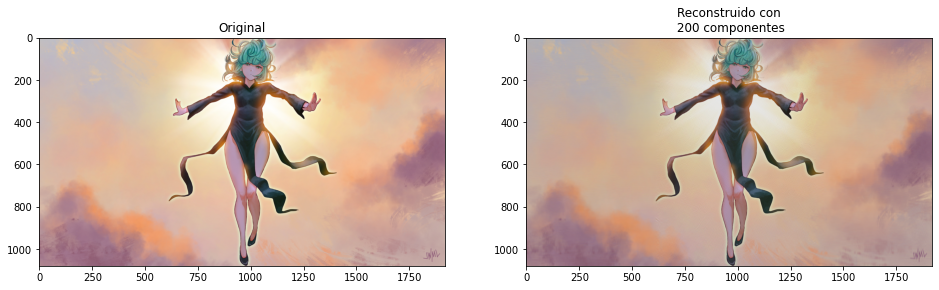

In [ ]:
f, (A1,A2) = plt.subplots(nrows=1, ncols=2,figsize=(16, 11))
alto_imagen = img.shape[0]
ancho_imagen = img.shape[1]
numero_canales = 3
cantidad_componentes = 200
reconstructed = reconstruct(img, k=cantidad_componentes)

tamaño_original = alto_imagen*ancho_imagen*numero_canales
tamaño_comprimido = cantidad_componentes * (1 + alto_imagen + ancho_imagen) * numero_canales
ratio = tamaño_comprimido * 1.0 / tamaño_original
print('La imagen comprimida representa el ' + str(round(ratio * 100, 2)) + '% de la imagen original ( '+str(tamaño_original)+' vs '+str(tamaño_comprimido)+' )')

A1.set_title(f"Original")
A1.imshow(img)
A2.set_title(f"Reconstruido con\n {cantidad_componentes} componentes")
A2.imshow(rescale_img(reconstructed))

In [ ]:
alto_imagen = img.shape[0]
ancho_imagen = img.shape[1]
numero_canales = 3
e = 300

porcentaje=30
while ratio==porcentaje:
  tamaño_original = alto_imagen*ancho_imagen*numero_canales
  rt = e * (1 + alto_imagen + ancho_imagen) * numero_canales
  ratio = round((rt * 1.0 / tamaño_original)*100,2)
  e=e+1

print('La imagen comprimida representa el ' +ratio + '% '+e)

TypeError: ignored

In [ ]:
imageio.imwrite('Comprimido.jpg', rescale_img(reconstructed) )